### Imports

In [29]:
import os
from pathlib import Path

In [30]:
import event_reader as helper

### Paths

In [31]:
SRC_DIR = Path.cwd()
ROOT_DIR = SRC_DIR.parent

DATA_DIR = os.path.join(ROOT_DIR, 'dataset')
PREPROCESSED_DIR = os.path.join(DATA_DIR, 'preprocessed')
CSV_PATH = os.path.join(DATA_DIR, 'csv_mappings', 'train.csv')

MODEL_DIR = os.path.join(ROOT_DIR, 'models')
BASELINE_DIR = os.path.join(MODEL_DIR, 'baselines_finetuned') 

### Set model to evaluate

In [32]:
model_type = 'custom_resnet' 
# alexnet # resnet # vgg16 # densenet # efficientnet
# custom_alexnet # custom_resnet # pretrained_alexnet

In [33]:
LOG_DIR = os.path.join(BASELINE_DIR, model_type, 'log')
RESULT_DIR = os.path.join(BASELINE_DIR, model_type, 'results')

### Reading event files

In [34]:
scalar_tags = helper.list_scalar_tags(LOG_DIR)

Available Scalar Tags:
Train/BatchLoss
Train/BatchAccuracy
Train/Loss
Train/Accuracy
Train/Learning Rate
Validation/BatchLoss
Validation/BatchAccuracy
Validation/Loss
Validation/Accuracy


In [35]:
all_metrics = helper.extract_all_metrics(LOG_DIR)
loss_accuracy_metrics = helper.extract_loss_and_accuracy(all_metrics)

### Plot loss and accuracy

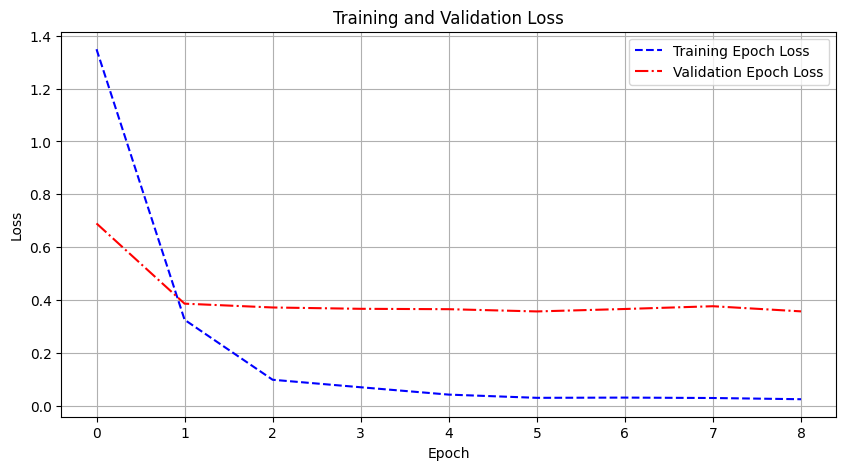

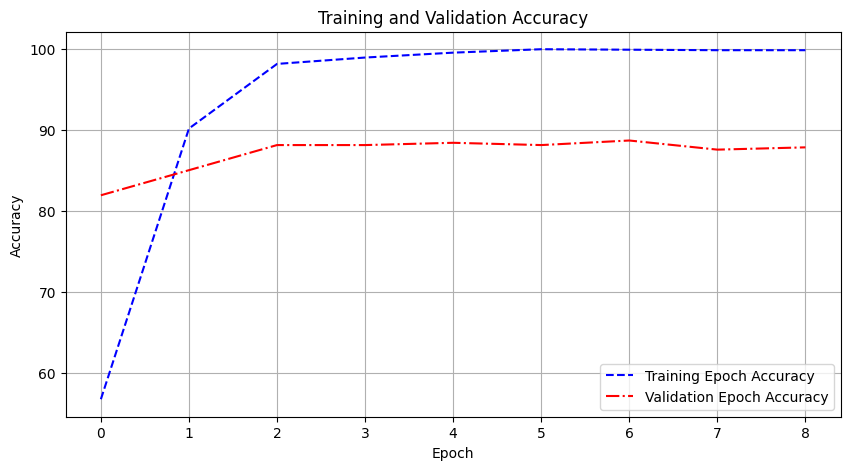

In [36]:
helper.plot_loss(loss_accuracy_metrics, use_batch_steps=False, save_path=RESULT_DIR)
helper.plot_accuracy(loss_accuracy_metrics, use_batch_steps=False, save_path=RESULT_DIR)

### Plot for all

In [37]:
model_types = [
    'alexnet', 
    'resnet', 
    'vgg16', 
    'densenet', 
    'efficientnet',
    'custom_alexnet', 
    'custom_resnet', 
]

all_models_metrics = {}

Processing metrics for model: alexnet


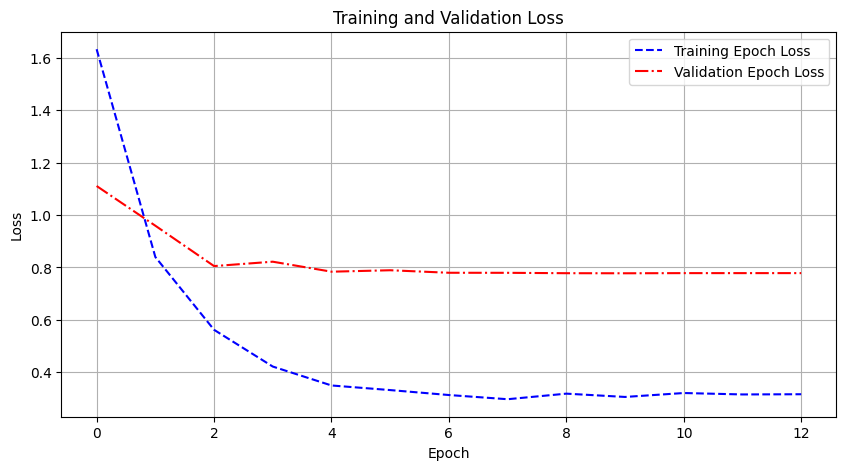

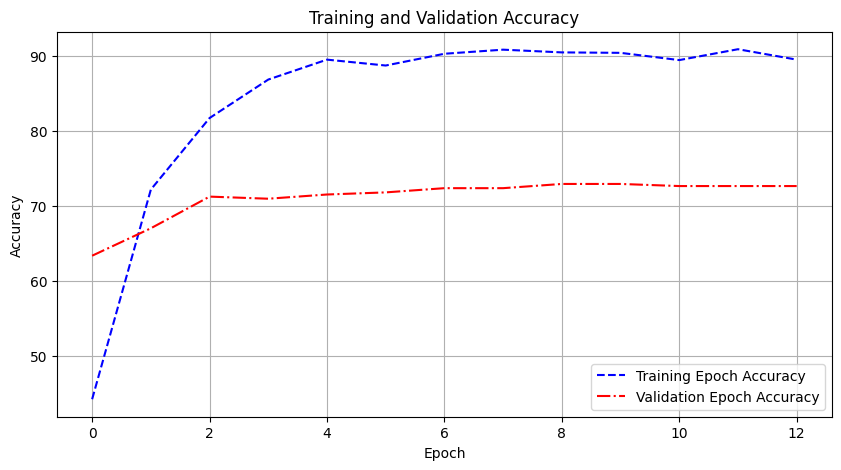

Processing metrics for model: resnet


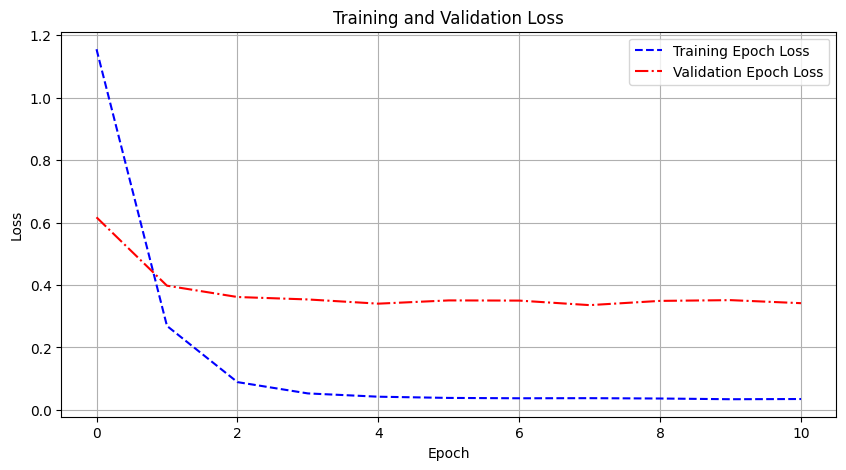

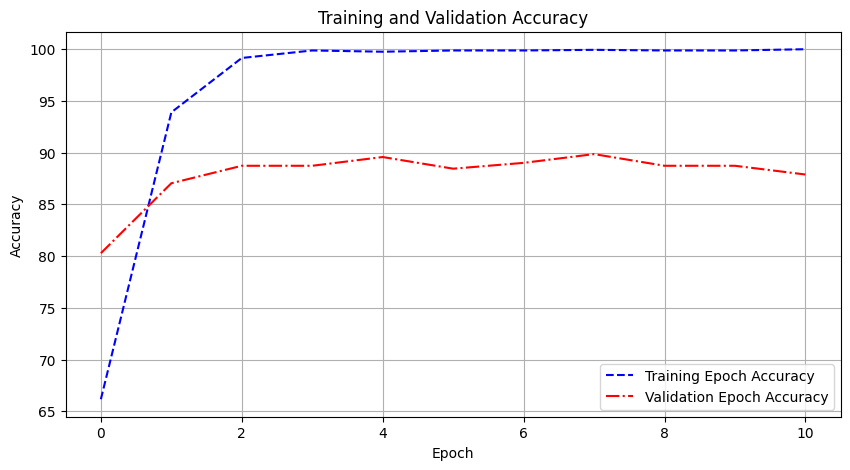

Processing metrics for model: vgg16


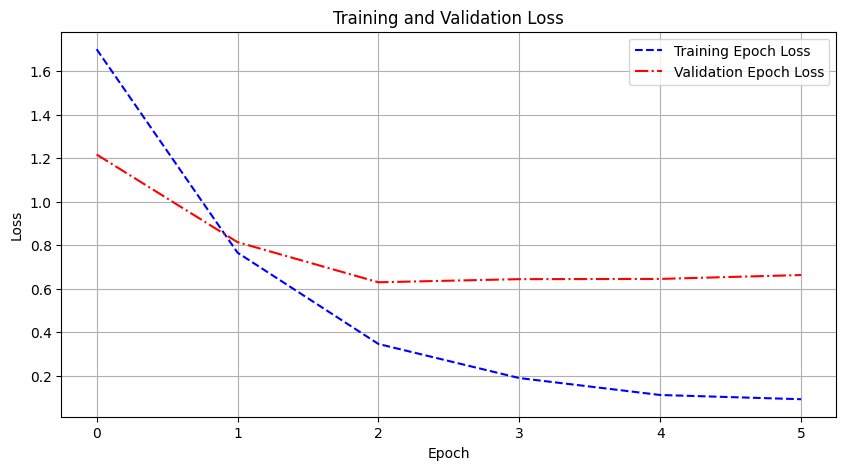

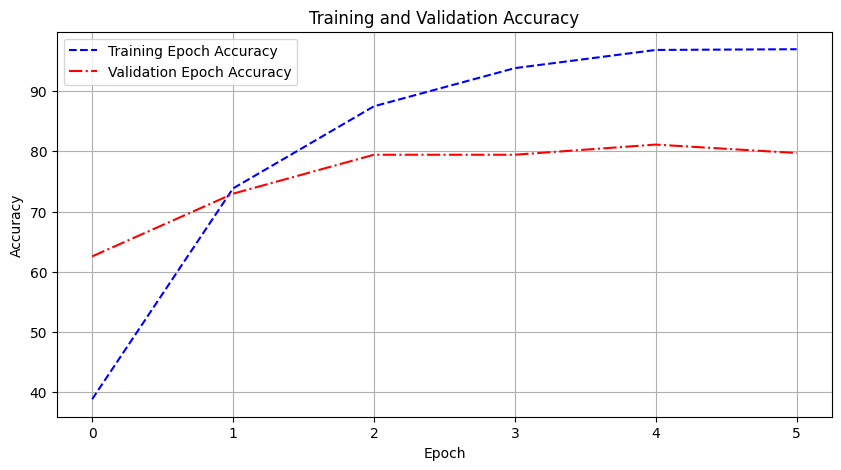

Processing metrics for model: densenet


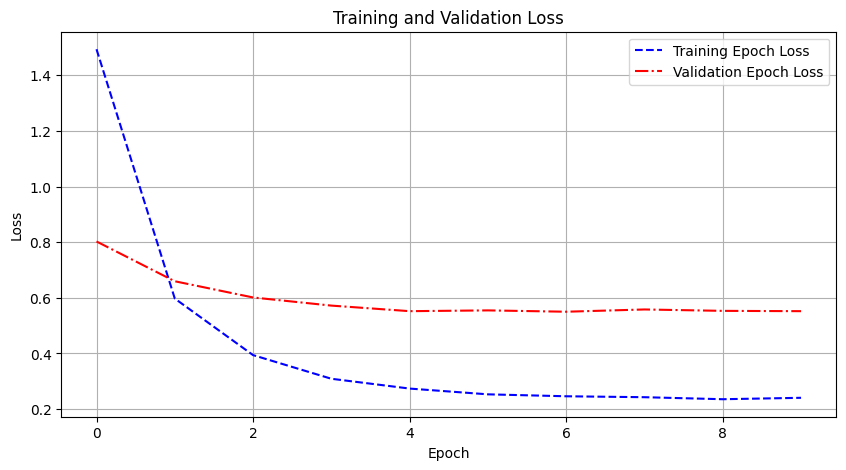

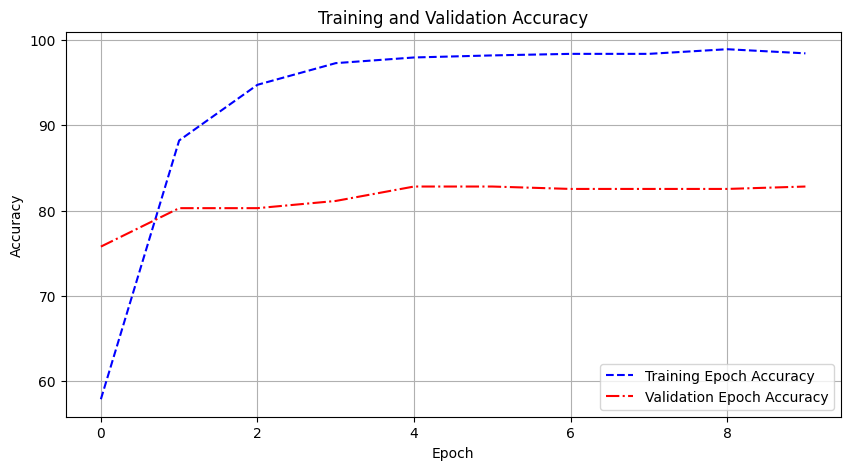

Processing metrics for model: efficientnet


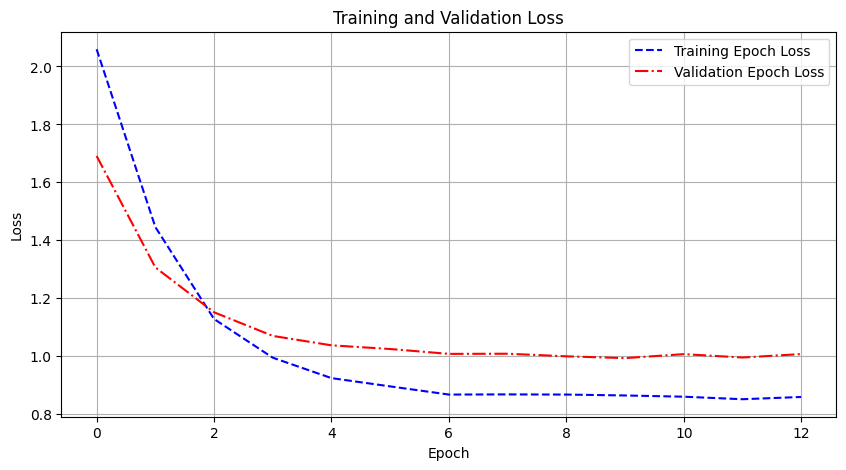

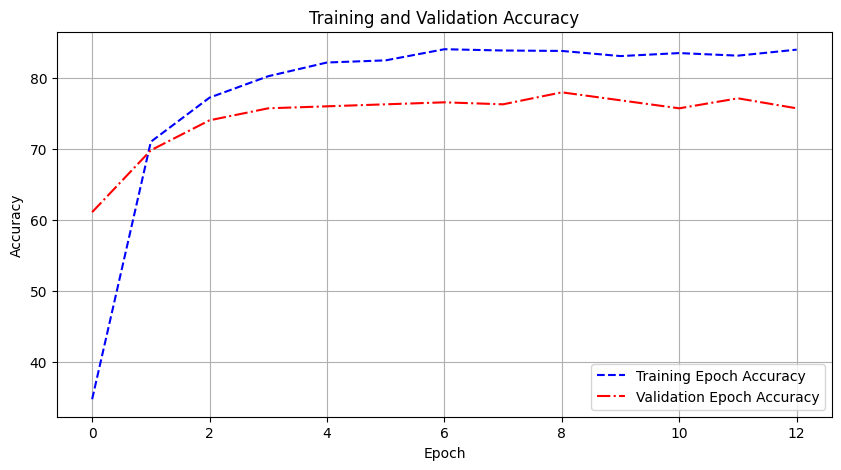

Processing metrics for model: custom_alexnet


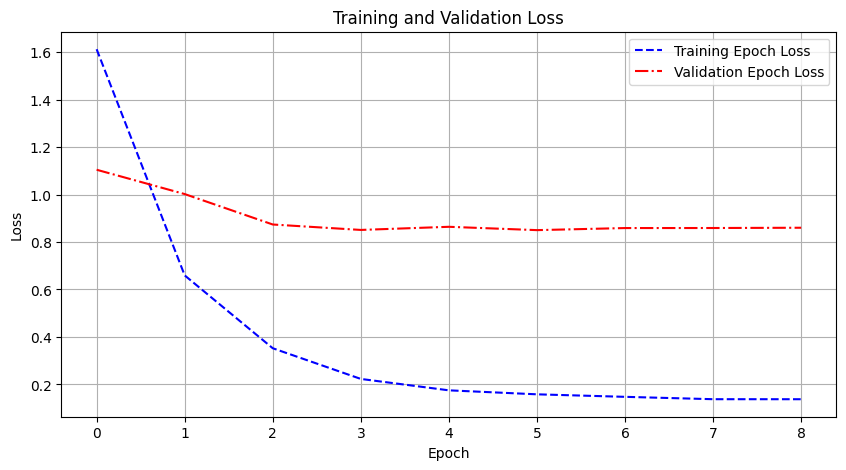

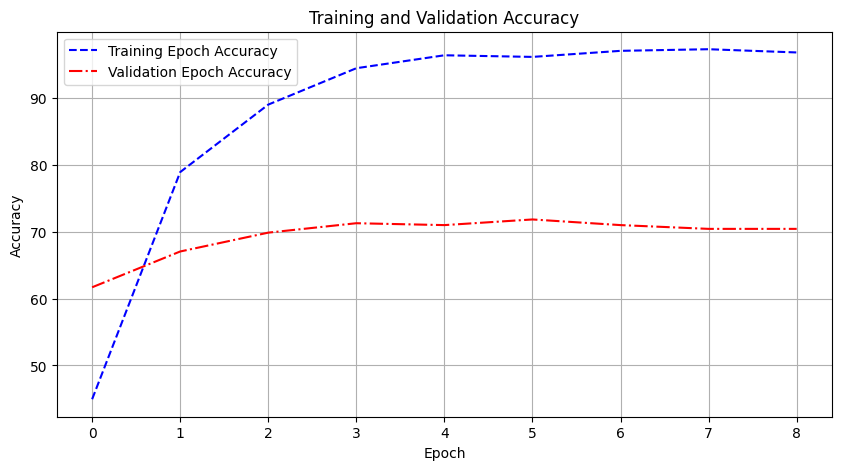

Processing metrics for model: custom_resnet


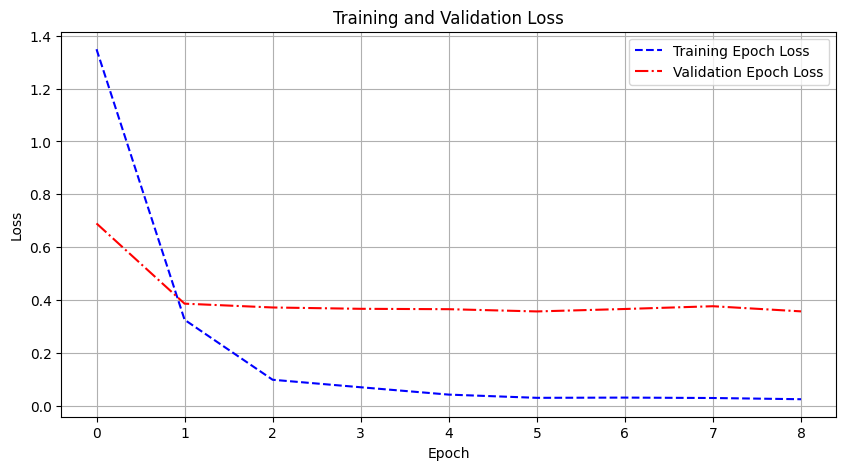

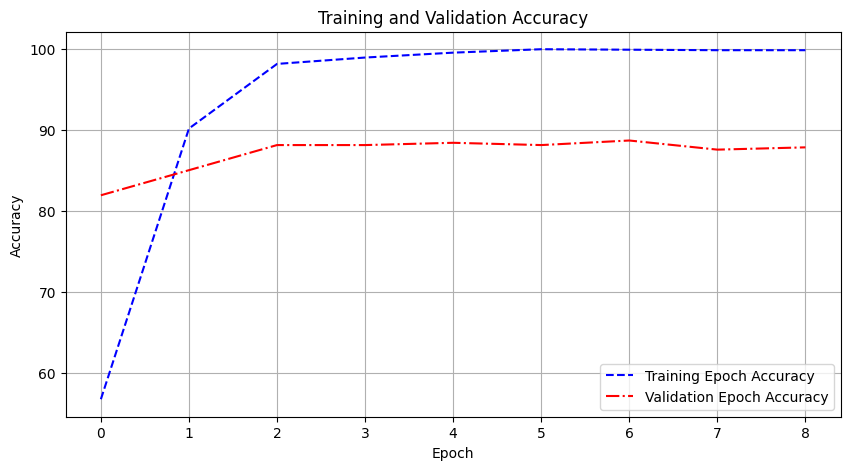

In [38]:
for model_type in model_types:
    print(f"Processing metrics for model: {model_type}")
    
    log_dir = os.path.join(BASELINE_DIR, f'{model_type}', 'log')
    result_dir = os.path.join(BASELINE_DIR, f'{model_type}', 'results')
    os.makedirs(result_dir, exist_ok=True)
    
    # Extract metrics
    all_metrics = helper.extract_all_metrics(log_dir)
    loss_accuracy_metrics = helper.extract_loss_and_accuracy(all_metrics)
    
    # Plot loss and accuracy for the current model
    helper.plot_loss(loss_accuracy_metrics, use_batch_steps=False, save_path=result_dir)
    helper.plot_accuracy(loss_accuracy_metrics, use_batch_steps=False, save_path=result_dir)

### Learning Rate

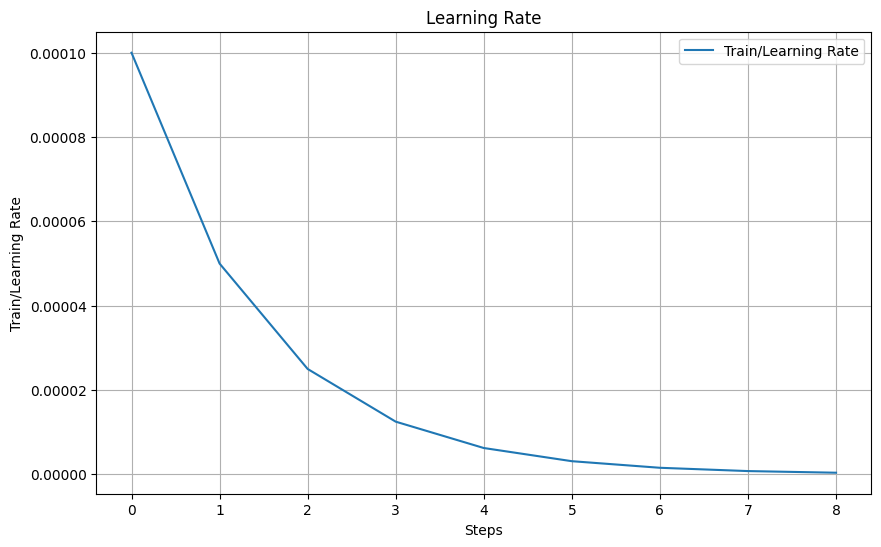

In [39]:
helper.plot_scalar_metric(LOG_DIR, 'Train/Learning Rate', 'Learning Rate', RESULT_DIR)

### Compare all models

In [40]:
model_types = ['alexnet', 'resnet', 'vgg16', 'densenet', 'efficientnet'] 
result_folder = os.path.join(BASELINE_DIR, 'comparison_results')

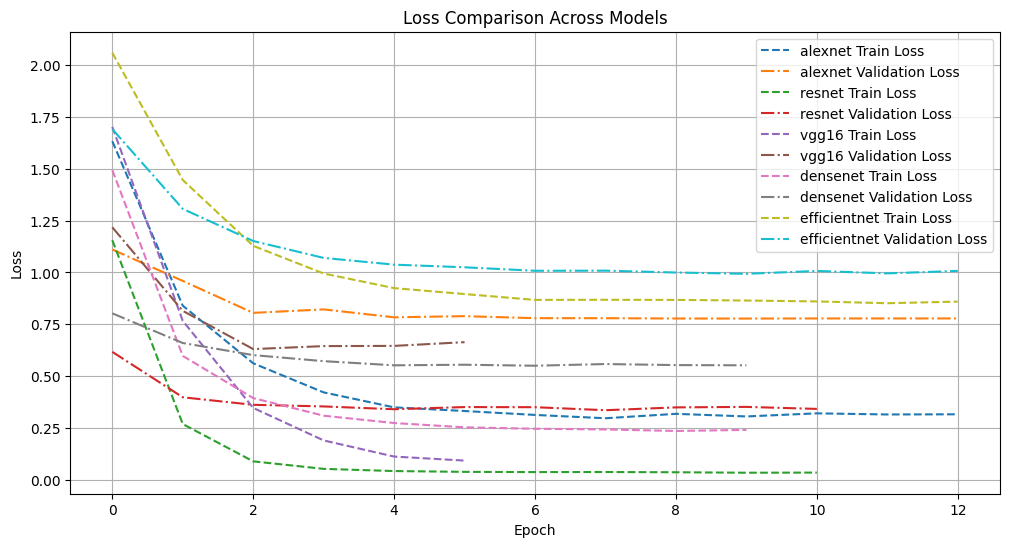

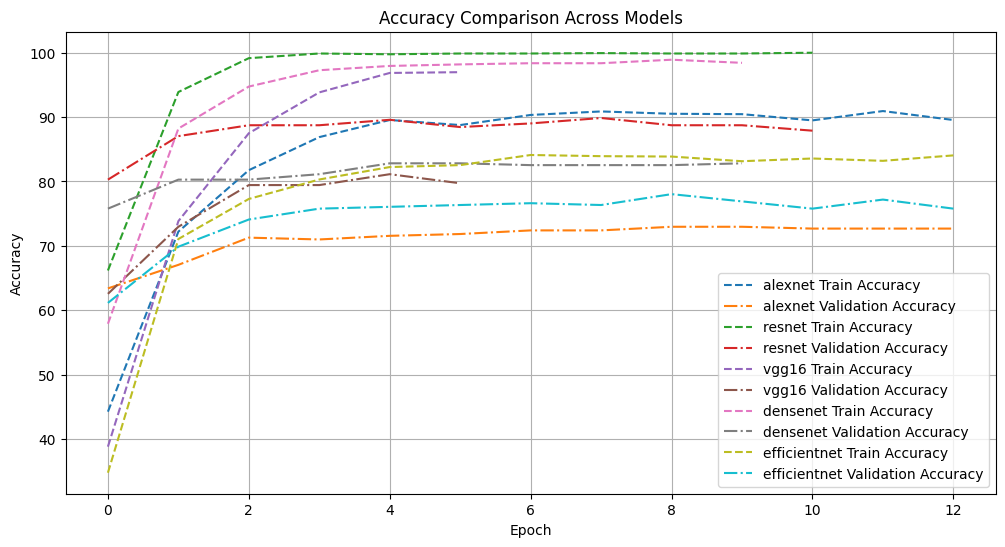

In [41]:
helper.compare_models(BASELINE_DIR, model_types, use_batch_steps=False, save_path=result_folder)